#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset reading

In [4]:
data_set = pd.read_csv('/content/Dataset_master - Model Selection - Combined Cycl.csv')

In [5]:
data_set.head()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,electrical energy output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
data_set.tail()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,electrical energy output
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [7]:
data_set.describe()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,electrical energy output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#Rename columns for easier access

In [9]:
data_set.columns = ['Temperature','Vacuum','Pressure','Humidity','Energy_Output']

#Visualizing Relationships

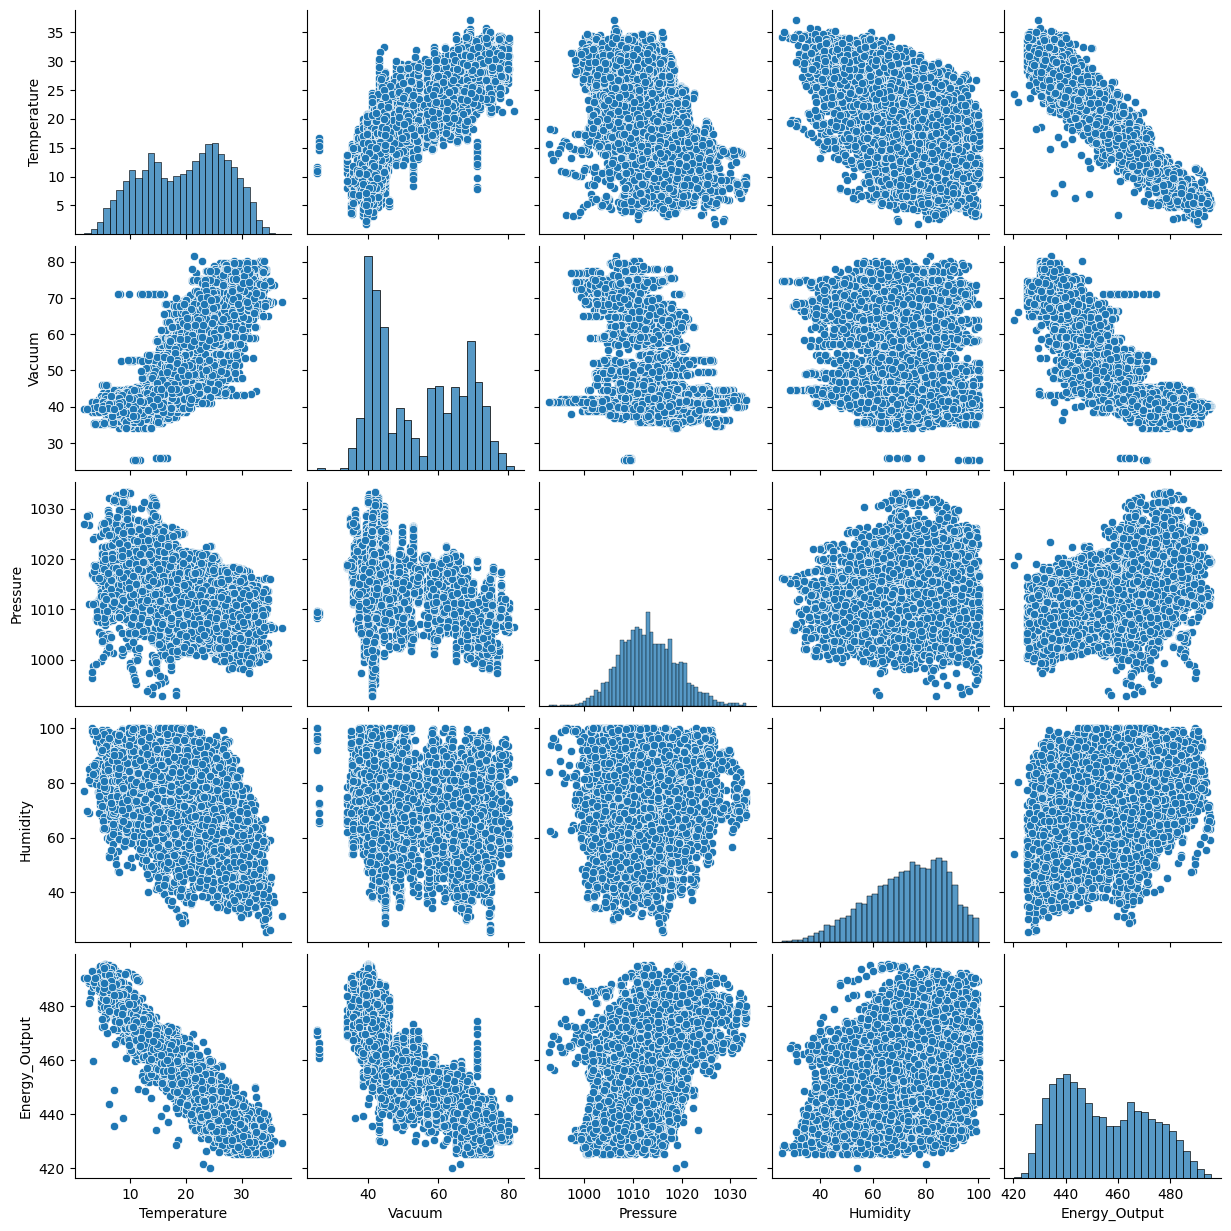

In [10]:
sns.pairplot(data_set)
plt.show()

#Spliting data into features(x) and target var(y)

In [11]:
x = data_set.drop(columns=['Energy_Output'])
y = data_set['Energy_Output']

##Spliting data into Training and testing sets (70-30)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 1. Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
L_R_model = LinearRegression()
L_R_model.fit(x_train,y_train)


LinearRegression()

In [22]:
#[Prediction]
y_pred_LR = L_R_model.predict(x_test)

# 2 . Decision Tree regression Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
R_F_model = RandomForestRegressor(n_estimators=100,random_state=42)
R_F_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [23]:
#Prediction
y_pred_RF=R_F_model.predict(x_test)

# 3. Random Foresr Regression Model

In [25]:
from sklearn.tree import  DecisionTreeRegressor
D_T_model = DecisionTreeRegressor(random_state=42)
D_T_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
#Prediction
y_pred_DT = D_T_model.predict(x_test)

#Evalute Function

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
def evaluate_model(y_true, y_pred_LR, L_R_model):
    r2 = r2_score(y_true, y_pred_LR)
    mae = mean_absolute_error(y_true, y_pred_LR)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_LR))
    print(f"Model: {L_R_model}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 50)
    return r2, mae, rmse

In [45]:
metrics = {}
metrics["Linear Regression"] = evaluate_model(y_test, y_pred_LR, "Linear Regression")

Model: Linear Regression
R² Score: 0.9275
MAE: 3.65
RMSE: 4.61
--------------------------------------------------


In [47]:
#Evalute Function Of Decision Tree Regression
def evaluate_model(y_true, y_pred_DT, D_T_model):
    r2 = r2_score(y_true, y_pred_DT)
    mae = mean_absolute_error(y_true, y_pred_DT)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_DT))
    print(f"Model: {D_T_model}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 50)
    return r2, mae, rmse

In [48]:
#Evaluate Model of Linear Regression:
metrics["Decision Tree Regression"] = evaluate_model(y_test, y_pred_DT, "Decision Tree Regression")

Model: Decision Tree Regression
R² Score: 0.9303
MAE: 3.11
RMSE: 4.52
--------------------------------------------------


In [49]:
#Evalute Function Of Random Forest Regression
def evaluate_model(y_true, y_pred_RF, R_F_model):
    r2 = r2_score(y_true, y_pred_RF)
    mae = mean_absolute_error(y_true, y_pred_RF)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_RF))
    print(f"Model: {R_F_model}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 50)
    return r2, mae, rmse

In [51]:
#Evaluate Model of Linear Regression:
metrics["Random Forest Regression"] = evaluate_model(y_test, y_pred_RF, "Random Forest Regression")

Model: Random Forest Regression
R² Score: 0.9617
MAE: 2.39
RMSE: 3.35
--------------------------------------------------


In [52]:
# Visualization of each regression model
def plot_regression_results(y_true, y_pred_LR, L_R_model, color):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, color="Red", alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual Energy Output (MW)")
    plt.ylabel("Predicted Energy Output (MW)")
    plt.title(f"Actual vs Predicted ({L_R_model})")
    plt.show()

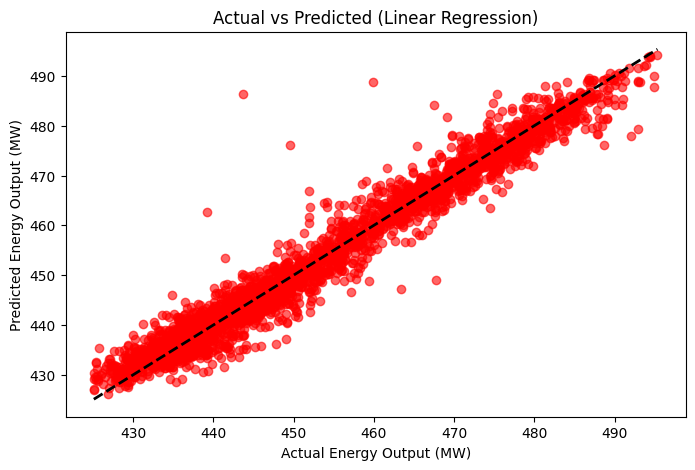

In [53]:
plot_regression_results(y_test, y_pred_LR, "Linear Regression", "Red")

In [54]:
def plot_regression_results(y_true, y_pred_DT, D_T_model, color):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred_DT, color='Blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual Energy Output (MW)")
    plt.ylabel("Predicted Energy Output (MW)")
    plt.title(f"Actual vs Predicted ({D_T_model})")
    plt.show()

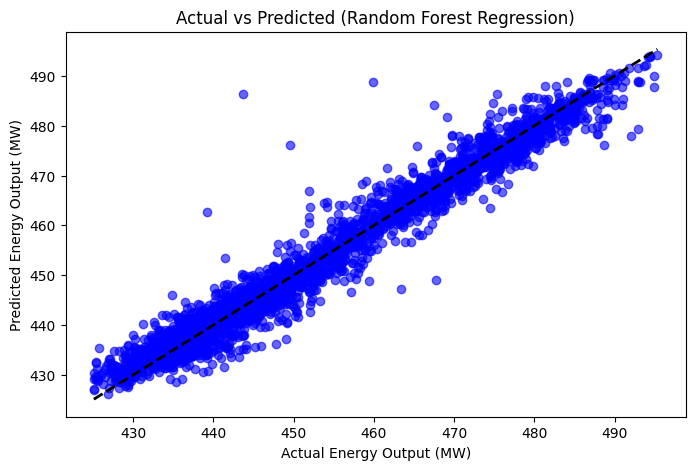

In [55]:
plot_regression_results(y_test, y_pred_RF, "Random Forest Regression", "Blue")

In [42]:
def plot_regression_results(y_true, y_pred_DT, D_T_model,color):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred_DT, color='Green', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual Energy Output (MW)")
    plt.ylabel("Predicted Energy Output (MW)")
    plt.title(f"Actual vs Predicted ({D_T_model})")
    plt.show()

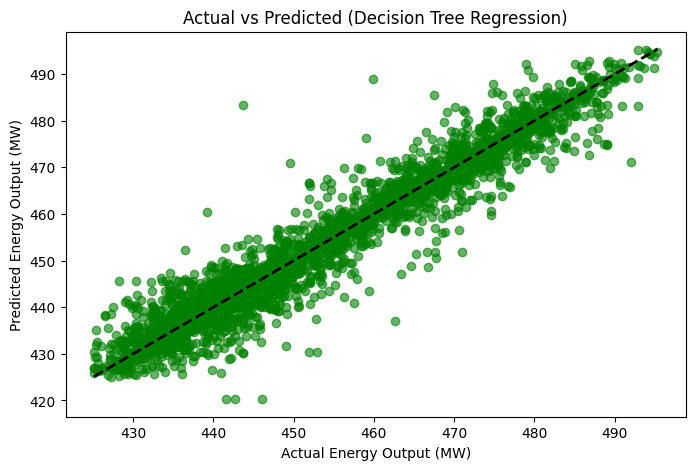

In [43]:
plot_regression_results(y_test, y_pred_DT, "Decision Tree Regression", "green")

In [56]:
# Determine the best model based on R² Score
best_model = max(metrics, key=lambda k: metrics[k][0])
print(f"The best performing model for this project is: {best_model}")

The best performing model for this project is: Random Forest Regression
